# Combining Color and Region Selections¶


## Importing Libraries

In [1]:
#import all the basic libraries required

#matplotlib.pyplot > Provides a MATLAB-like plotting framework. pylab combines pyplot with numpy into a single namespace. 
import matplotlib.pyplot as plt 
#This is further referef as 'plt' for convenience

#matplotlib.image > Provides operations for importing images including metadata from them
import matplotlib.image as mpimg 
#This is further refered as 'mpimg' for convenience

#NumPy is the fundamental package for scientific computing with Python. 
#It contains among other things: a powerful N-dimensional array object sophisticated (broadcasting) functions etc.
import numpy as np 
#This is further refered as 'np'


## import a sample image and print some stats

In [2]:
#we have a image file 'prog2.jpg' in same directory
image=mpimg.imread('prog2.jpg')

#now onwards we can refer prog2.jpg as a multi dimensional array named 'image'



## Display the image along with some of its metadata resources

In [3]:
## First the image imported shall be displayed to ensure the import was successful
plt.imshow(image) #we have imported our prog1.jpg to the array named image

#after the end of previuos command the image is exported to the display buffer. Now we will display the image

The Original image:


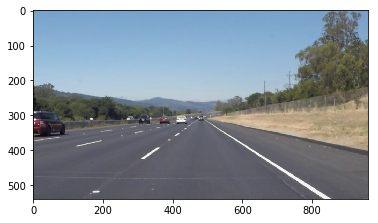

In [4]:
#after the end of previuos command the image is exported to the display buffer. Now we will display the image
print ('The Original image:')
plt.show() #this command will display the content in the display buffer.
#This will execute only along with a previuos command which writes something into the buffer

## displaying the metadata informations

In [5]:
#image type is stored in type(image), dimensions is a 2D array in image.shape as ysize,xsize
print('This image is: ',type(image), 'with dimensions:', image.shape)


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


## obtaining specific metadata like image dimensions

In [6]:
ysize=image.shape[0] #ysize
xsize=image.shape[1] #xsize

print('This image has following dimensions')
print('Height :', ysize, 'pixels') #display ysize
print('Width  :', xsize, 'pixels') #display xsize


This image has following dimensions
Height : 540 pixels
Width  : 960 pixels


## Create a temporary copy to work upon our logics

In [7]:
temp_img=np.copy(image) #now temp_img will have same information as original image

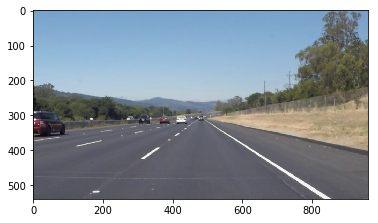

In [8]:
plt.imshow(temp_img) #write the image to display buffer
plt.show() #display everything from display buffer

## Create a region of interest

In [9]:
#lets start by defining vertices A,B,C as left_bottom, right_bottom and apex
left_bottom = (0,ysize)  #define lowest valueof X and max of Y
right_bottom = (xsize, ysize)
apex = (xsize*.5,ysize*.57)  
#the midpoint for Xvalue and the height is optimised for .57 of the actual image for optimised Field of View

#Now we can draw lines between these points using polyfit function.
#The function takes values of x1,x2,y1,y2 to make lines between (x1,y1) and (x2,y2)

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

## Generation of Masking Area

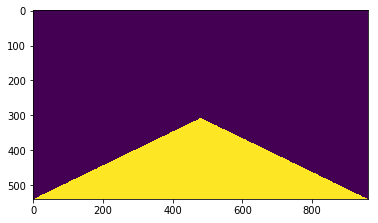

In [10]:
## Find the region inside the three lines

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
        
plt.imshow(region_thresholds)
plt.show()

## Mask Overlay over the Actual Image

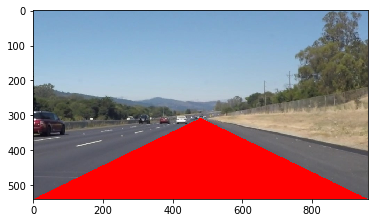

In [11]:
#paint everything inside the region in RED [255,0,0]

mask_region=np.copy(temp_img) #A copy of the image is created to work upon with MASK Layer
mask_region[region_thresholds] = [255,0,0] # The selected region is painted RED 
plt.imshow(mask_region) #show the masked region
plt.show()


## Generation of Field of View under Observation under the masked region

The Final Field of View under Observation


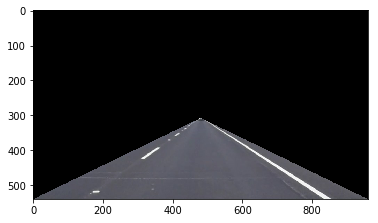

In [12]:
#paint everything inside the region in RED [255,0,0]

FOV=np.copy(temp_img)
FOV[~region_thresholds] = [0,0,0]
print ('The Final Field of View under Observation')
plt.imshow(FOV)
plt.show()

## Defining Addition Filter Parameter : Say Colour

#### We will define additional parameter to isolate the required info from the FOV image. 
#### Here we will use a colour filter to isolate the Bright lines from the Dark Road

In [13]:
## Create a Filter Function to identify the Bright Colours

In [14]:
#To define a Filter parameters, we create a array which holds all the parameters

red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold] 

#Now rgb_threshold can be used as a filter function to obtain the parameters

In [15]:
## Identification of pixels which are under the threshold values

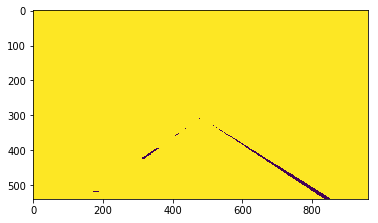

In [16]:
# temp_img[:,:,0] represent RED Channel, 1 > GREEN , 2 > BLUE
org_img=np.copy(FOV) #we create a copy of FOV to preserve the original FOV file
color_threshold_img = (org_img[:,:,0] < rgb_threshold[0]) |  (org_img[:,:,1] < rgb_threshold[1]) | (org_img[:,:,2] < rgb_threshold[2])

plt.imshow(color_threshold_img)
plt.show()

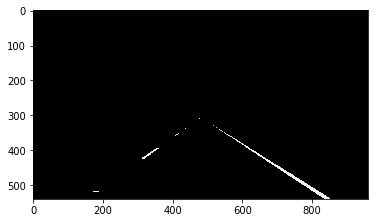

In [17]:
org_img[color_threshold_img] = [0,0,0]
plt.imshow(org_img)
plt.show()

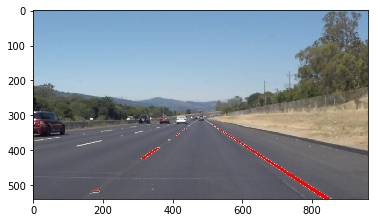

In [24]:
lane_img = np.copy(image)
lane_img[~color_threshold_img] = [255,0,0]
plt.imshow(lane_img)
plt.show()

## Save the image

In [ ]:
# Save the image temp_img to a file
# mpimg.imsave("prog1-result.jpg", temp_img) 

## End of Program